<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_4/Competitive_ML4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://habr.com/ru/company/ods/blog/324402/

# 4.2.3

Выберите все подходящие ответы из списка



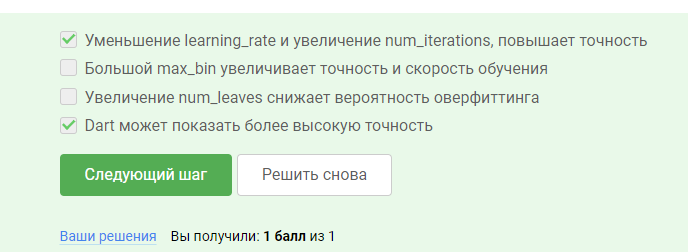

# 4.2.4

Для борьбы с переобучением:

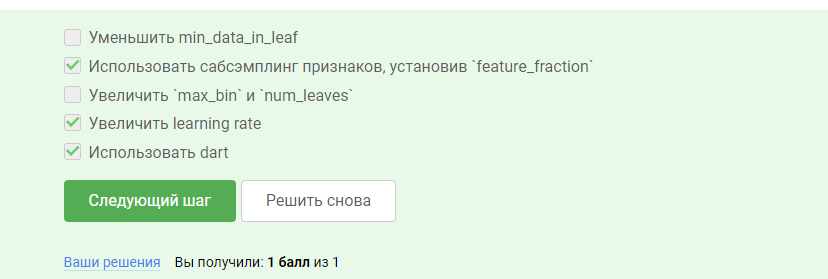

# 4.2.5

У LightGBM есть особенность 

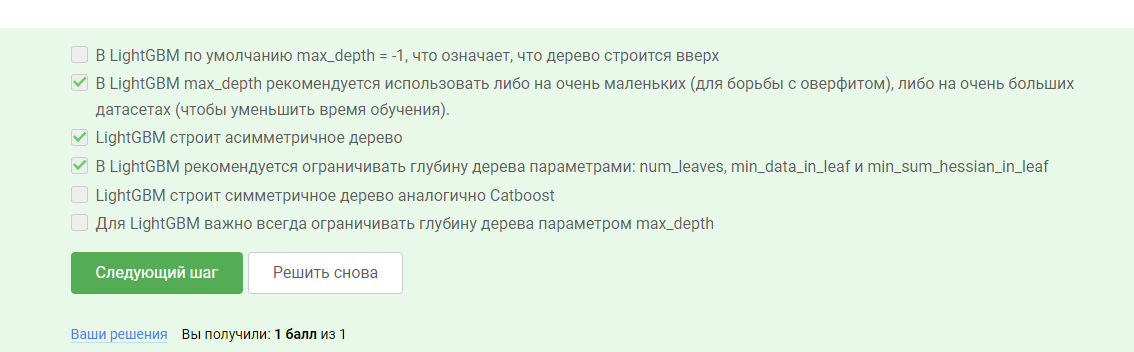

# 4.2.6

Кастомыные loss'ы & eval функции в LightGBM.
В этой задаче предлагаем попрактиковаться в написании кастомных функций для обучения LightGBM.

A custom objective in LightGBM requires two functions:

loss function (fobj) returns the derivatives for optimization
eval function (feval) returns a loss value for monitoring.
Задача:  Реализуйте 2 функции custom_l2_loss() и custom_l2_eval(), которые можно подать в качестве параметров fobj и feval в функцию lgb.train().

https://stackoverflow.com/questions/69137780/provide-additional-custom-metric-to-lightgbm-for-early-stopping

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv')
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel
...,...,...,...,...,...,...,...,...,...,...
2332,j21246192N,Smart ForFour,economy,petrol,4.38,2017,121239,2018,25.48,wheel_shake
2333,h-1554287F,Audi A4,premium,petrol,4.30,2016,107793,2020,69.26,engine_check
2334,A15262612g,Kia Rio,economy,petrol,3.88,2015,80234,2019,46.03,gear_stick
2335,W-2514493U,Renault Sandero,standart,petrol,4.50,2014,60048,2020,77.19,another_bug


In [ ]:
# df.columns

In [ ]:
# df.car_id.value_counts()

In [ ]:
# cat_cols = ['model', 'car_type', 'fuel_type',  'year_to_start', 'year_to_work']
# df[cat_cols]

In [ ]:
cat_cols = ['model', 'car_type', 'fuel_type',  'year_to_start', 'year_to_work']
extra_cols = ['car_rating']
target = ['target_reg']

cols = cat_cols + extra_cols

X = df[cols]
y = df[target]

In [ ]:
X.head()

,model,car_type,fuel_type,year_to_start,year_to_work,car_rating
0,Kia Rio X-line,economy,petrol,2015,2021,3.78
1,VW Polo VI,economy,petrol,2015,2021,3.90
2,Renault Sandero,standart,petrol,2012,2017,6.30
3,Mercedes-Benz GLC,business,petrol,2011,2020,4.04
4,Renault Sandero,standart,petrol,2012,2017,4.70


In [ ]:
!pip install lightgbm -q

import lightgbm as lgb

In [ ]:
# y

In [ ]:
# y.values.ravel()

In [ ]:
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# таргет так же придется перевести из строкового типа в целочисленный
le_tar = LabelEncoder()
y = le_tar.fit_transform(y.values.ravel())

In [ ]:
X.head()

,model,car_type,fuel_type,year_to_start,year_to_work,car_rating
0,8,1,1,4,7,3.78
1,23,1,1,4,7,3.90
2,16,3,1,1,3,6.30
3,12,0,1,0,6,4.04
4,16,3,1,1,3,4.70


In [ ]:
# y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

In [ ]:
from lightgbm import Dataset

train_data = Dataset(
    X_train,
    y_train,
    categorical_feature=cat_cols,
    free_raw_data=False,
)

# Еще валидационный датасет для настройки ранней остановки
val_data = Dataset(
    X_test,
    y_test,
    categorical_feature=cat_cols,
    free_raw_data=False,
)

In [ ]:
# # предикты получаем методом get_label()
# def custom_l2_loss(y, data):
#     t = data.get_label()
    
#     # YOUR CODE HERE ...
    
#     return grad, hess

# def custom_l2_eval(y, data):
#     t = data.get_label()
#     # YOUR CODE HERE ...
#     return 'l2', ###, ###

In [ ]:
import numpy as np

In [ ]:
# предикты получаем методом get_label()
def custom_l2_loss(y, data):
    # print('y', y)
    # print('data', data)
    t = data.get_label()
    # print('t', t)
    # YOUR CODE HERE ...
    grad = y - t
    # print(grad)
    hess = [1 for i in range(len(t))]
    print('hello first')
    return grad, hess

def custom_l2_eval(y, data):
    print('hello')
    t = data.get_label()
    
    l2_norm = np.empty_like(y)
    l2_norm = (1 / 2) * ((y - t) ** 2)
    print(l2_norm)

    return 'l2', l2_norm, True

Почему-то код с 1/2 не работает. Точнее с любым множителем не работает.

In [ ]:
# Такой код должен отрабатывать
lgbm_params = {
    'random_seed': 42
    }

model = lgb.train(lgbm_params, 
                  lgb.Dataset(X_train, y_train),
                  fobj=custom_l2_loss,
                  feval=custom_l2_eval
                  )

len(model.predict(X_test))

[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 6
[LightGBM] [Warning] Using self-defined objective function


468

In [ ]:
model.predict(X_test)

In [ ]:
y_test

Тестирование правильно ли считаетмся l2

In [ ]:
import numpy as np

actual = np.array([10, 11, 12, 13])
prediction = np.array([10, 12, 14, 11])

l2_loss = (actual - prediction) ** 2
l2_norm = (1/2) *((prediction - actual) ** 2)

mse_cost = l2_loss.mean()

In [ ]:
l2_loss

array([0, 1, 4, 4])

In [ ]:
l2_norm

array([0. , 0.5, 2. , 2. ])

In [ ]:
def custom_l2_loss(y, data):
    t = data.get_label()
    grad = y - t 
    hess = np.ones_like(y)
    return grad, hess

def custom_l2_eval(y, data):
    t = data.get_label()
    loss = (y - t) ** 2 
    return 'l2', loss.mean(), False

In [ ]:
def custom_l2_loss(y, data):
    t = data.get_label()
    grad = y - t 
    hess = np.ones_like(y)
    return grad, hess

def custom_l2_eval(y, data):
    t = data.get_label()
    loss = (y - t) ** 2 
    return 'l2', loss.mean(), False

Верный вариант работы.

In [ ]:
# предикты получаем методом get_label()
def custom_l2_loss(y, data):
    
    t = data.get_label()
    grad = y - t
    hess = [1 for i in range(len(t))]   
    
    return grad, hess

def custom_l2_eval(y, data):
       
    t = data.get_label()
    loss = (y - t) ** 2 
    return 'l2', loss.mean(), False

In [ ]:
# Такой код должен отрабатывать
lgbm_params = {
    'random_seed': 42
    }

model = lgb.train(lgbm_params, 
                  train_set=train_data,                 
                  fobj=custom_l2_loss,
                  feval=custom_l2_eval
                  )

len(model.predict(X_test))

[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 6
[LightGBM] [Warning] Using self-defined objective function


468

## experiments

In [ ]:
from scipy import special

def logloss_objective(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)
    grad = p - y
    hess = p * (1 - p)
    return grad, hess

def logloss_metric(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)

    ll = np.empty_like(p)
    pos = y == 1
    ll[pos] = np.log(p[pos])
    ll[~pos] = np.log(1 - p[~pos])

    is_higher_better = False
    return 'logloss', -ll.mean(), is_higher_better

In [ ]:
from sklearn import metrics

In [ ]:
model = lgb.train(lgbm_params, 
                  lgb.Dataset(X_train, y_train),
                  fobj=logloss_objective,
                  feval=logloss_metric)

# Notice how we use a sigmoid here to obtain probabilities
y_pred = special.expit(model.predict(X_test))

# print()
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

In [ ]:
! curl -O maxhalford.github.io/files/datasets/creditcardfraud.zip
# ! unzip creditcardfraud

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   162  100   162    0     0   5785      0 --:--:-- --:--:-- --:--:--  5785


In [ ]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv('/content/creditcard_csv.csv')
X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42
)

X_fit, X_val, y_fit, y_val = model_selection.train_test_split(
    X_train, y_train,
    random_state=42
)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
5771,6158,-0.037080,1.733348,0.702503,3.064567,0.523497,0.687991,-0.436124,-2.942069,-0.876186,...,0.890005,-1.483589,0.010831,-0.304638,-0.473059,1.539484,0.457664,-0.024718,0.166885,25.02
1292,1001,-0.676991,1.201683,1.594477,-0.003437,-0.269185,-1.113540,0.688085,-0.074098,-0.214681,...,0.202999,-0.239724,-0.563061,0.024061,0.687744,-0.189759,0.056154,0.377242,0.181533,4.95
70,46,1.006589,-0.071105,0.347614,1.329684,-0.193240,0.155418,0.008574,0.146538,0.103844,...,-0.091367,-0.020239,-0.018881,-0.120966,0.027382,0.593864,-0.334688,0.021368,0.015080,67.97
4941,4490,-2.373203,1.076469,1.859838,1.553613,-0.980265,0.009252,-0.671729,0.947818,0.860907,...,-0.132566,-0.007995,0.514375,0.345651,0.365232,0.280910,-0.171901,0.251367,-0.019556,60.00
1305,1023,1.202954,0.237380,0.628756,0.548826,-0.481895,-0.774287,-0.005618,-0.097441,-0.297402,...,-0.059345,-0.186972,-0.557239,0.143682,0.542790,0.175362,0.062924,-0.029675,0.011921,1.98


In [ ]:
# y_fit

In [ ]:
import lightgbm
from sklearn import metrics

fit = lightgbm.Dataset(X_fit, y_fit)
val = lightgbm.Dataset(X_val, y_val, reference=fit)

model = lightgbm.train(
    params={
        'learning_rate': 0.01,
        'objective': 'binary'
    },
    train_set=fit,
    num_boost_round=10000,
    valid_sets=(fit, val),
    valid_names=('fit', 'val'),
    early_stopping_rounds=20,
    verbose_eval=100
)

y_pred = model.predict(X_test)

print()
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

ValueError: ignored

https://maxhalford.github.io/blog/lightgbm-focal-loss/

https://hippocampus-garden.com/lgbm_custom/  - полное решение

https://forum.numer.ai/t/custom-objective-for-lightgbm/4677

https://stackoverflow.com/questions/69137780/provide-additional-custom-metric-to-lightgbm-for-early-stopping

https://www.kaggle.com/code/ttahara/example-of-lgbm-custom-metric/notebook

https://m-e-gorelli.medium.com/pass-a-custom-evaluation-metric-to-lightgbm-65ef062415ad

https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/basic.html#

https://stephenallwright.com/l2-loss-function/

In [ ]:
def l2_loss(y, data):
    t = data.get_label()
    w = data.get_weight()
    grad = w * (y - t) 
    hess = w
    return grad, hess

def l2_eval(y, data):
    t = data.get_label()
    w = data.get_weight()
    loss = np.sum(w * (y - t)**2) / np.sum(w)
    return 'weighted_l2', loss, False

# 4.2.7

В LightGBM есть колбэк функция reset_parameter, в которую можно подать параметр и список его значений для каждой итерации. Давайте напишем функцию генерирующую список значений для параметра learning_rate, которая, по аналогии шедулеров применяемых при обучении нейронных сетей, будет постепенно уменьшать значение learning rate, чтобы одновременно увеличить скорость обучения и точность модели.

Задача: Напишите функцию generate_lr_list(), которая будет выдавать список значений для использованния в колбэке reset_parameter.

Параметры функции:

start:float - начальное значение learning rate

stop:float - конечное значение learning rate

iterations:int - общее количество итераций (n_estimators)

step:int - шаг после которого понижаем learning rate, например понижаем через каждые 5 итераций (step=5)

Функция должна вернуть последовательность значений learning rate от начального значения до конечного пошагово понижая learning rate, при этом каждый шаг содержит повторяющиеся значения learning rate. Если общее количество итераций не кратно шагу, то конечное значение learning rate необходимо применить к последнему неполному шагу.

In [ ]:
# Пример использования функции
def generate_lr_list():
    #YOUR CODE
    return lr_list # len(lr_list) == n_estimators

booster = lgb.LGBMModel(n_estimators=100, objective='mae')
booster.fit(X_train, y_train,
    eval_set=[(X_test, y_test),], eval_metric="rmse",
    callbacks=[lgb.reset_parameter(learning_rate=generate_lr_list())])

In [ ]:
def generate_lr_list(start:float, stop:float, iterations:int, step:int)->list():
    # YOUR CODE HERE ...
    return ###

Один из тестов проверяющей системы для отладки:
Функция с параметрами: generate_lr_list(1, 0.1, 10, 3) - с 1 до 0.1, понижаем через каждые 3 итерации, всего 10 итераций
Результат: [1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.4, 0.4, 0.4, 0.1]

In [ ]:
def generate_lr_list():
    
    return lr_list # len(lr_list) == n_estimators

In [12]:
1-0.1

0.9

In [9]:
10//3

3

In [29]:
def generate_lr_list(start, stop, iterations, step):
  lr = start
  lr_list = []
  down_counts = iterations // step
  lenght = start - stop
  value_step = lenght / down_counts
  # print(value_step)


  for i in range(iterations):
    # print(i, 'iter')
    # print(i % step)
    if i % step != 0 or i == 0:
      # print('hello')
      lr_list.append(round(lr, 1))

    else:
      lr -= value_step
      lr_list.append(round(lr, 1))
    # print(lr_list)
  return lr_list

generate_lr_list(1, 0.1, 10, 3)

[1, 1, 1, 0.7, 0.7, 0.7, 0.4, 0.4, 0.4, 0.1]

In [82]:
def generate_lr_list(start, stop, iterations, step):
  lr = start
  lr_list = []
  down_counts = (iterations // step)
  print('down_counts', down_counts)
  lenght = start - stop
  # print(lenght)
  value_step = lenght / down_counts
  print('value_step', value_step)
  
  st  = 0
  for i in range(iterations):    
    if i % step != 0 or i == 0:      
      lr_list.append(round(lr, 2))
      # lr_list.append(lr)

    else:
      st += 1
      lr -= value_step
      if st == down_counts:
        lr = stop
      print(st, lr)
      # lr_list.append(lr)
      lr_list.append(round(lr, 2))
    
  return lr_list

In [83]:
generate_lr_list(1, 0.1, 10, 2)

down_counts 5
value_step 0.18
1 0.8200000000000001
2 0.6400000000000001
3 0.46000000000000013
4 0.28000000000000014


[1, 1, 0.82, 0.82, 0.64, 0.64, 0.46, 0.46, 0.28, 0.28]

In [84]:
generate_lr_list(1, 0.1, 10, 3)

down_counts 3
value_step 0.3
1 0.7
2 0.39999999999999997
3 0.1


[1, 1, 1, 0.7, 0.7, 0.7, 0.4, 0.4, 0.4, 0.1]

In [ ]:
[1, 1, 1, 0.7, 0.7, 0.7, 0.4, 0.4, 0.4, 0.1]

In [100]:
10 % 3

1

In [101]:
def generate_lr_list(start, stop, iterations, step):
  lr = start
  lr_list = []

  print(iterations % 2)

  if iterations % step == 0:
    print('hi')
    down_counts = (iterations // step) - 1
  else:
    down_counts = (iterations // step)
  print('down_counts', down_counts)
  lenght = start - stop
  # print(lenght)
  value_step = lenght / down_counts
  print('value_step', value_step)
  
  st  = 0
  for i in range(iterations):    
    if i % step != 0 or i == 0:      
      lr_list.append(round(lr, 3))
      # lr_list.append(lr)

    else:
      st += 1
      lr -= value_step
      if st == down_counts:
        lr = stop
      print(st, lr)
      # lr_list.append(lr)
      lr_list.append(round(lr, 3))
    
  return lr_list

In [103]:
generate_lr_list(1, 0.1, 10, 2)

0
hi
down_counts 4
value_step 0.225
1 0.775
2 0.55
3 0.32500000000000007
4 0.1


[1, 1, 0.775, 0.775, 0.55, 0.55, 0.325, 0.325, 0.1, 0.1]

Верное решение.

In [110]:
def generate_lr_list(start, stop, iterations, step):
  lr = start
  lr_list = []

  if iterations % step == 0:   
    down_counts = (iterations // step) - 1
  else:
    down_counts = (iterations // step)
  
  lenght = start - stop  
  value_step = lenght / down_counts
  
  for i in range(iterations):    
    if i % step != 0 or i == 0:      
      lr_list.append(round(lr, 3))
      
    else:
      lr -= value_step
      lr_list.append(round(lr, 3))
    
  return lr_list

In [111]:
generate_lr_list(1, 0.1, 10, 3)

[1, 1, 1, 0.7, 0.7, 0.7, 0.4, 0.4, 0.4, 0.1]

Решение другого

In [107]:
def generate_lr_list(start:float, stop:float, iterations:int, step:int)->list():
    generated_lr = []
    num_integer, num_remainder = iterations//step, iterations%step
    for i in np.linspace(start, stop, num_integer+(1 if num_remainder>0 else 0)): 
        if i!=stop or num_remainder==0: generated_lr.extend([i]*step)
        else: generated_lr.extend([i]*num_remainder)
    return generated_lr